In [96]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from cmath import phase
from cmath import exp,pi                      

In [97]:
#convertion binaire gray en décimal
def gray2dec(num):
    """retourne le nombre entier correspondant au code Gray num"""
    shift = 1
    while True:
        idiv = num >> shift
        num ^= idiv
        if idiv <= 1 or shift == 32: 
            return num
        shift <<= 1
        
        
#génération d'un seul chirp
def mod_LoRa(SF,data,B):
    #constantes
    M=2**SF
    TS=M/(B[1]-B[0])
    l=gray2dec(int(data,2))
    D=np.linspace(0, TS, num=M)
    S=[(i*(B[1]-B[0])/(TS))-(B[1]-B[0])/2 for i in D]
    A=S[0:l+1]
    B=S[l+1:len(S)]
    Ya=[]
    Yb=[]
    Ya=[exp(2j*pi*((1/2*M)*(((B[1]-B[0])*M/TS)**2)*h*h+(-0.5+l/M)*((B[1]-B[0])*M/TS)*h)) for h in range(len(A))]
    Yb=[exp(2j*pi*((1/2*M)*(((B[1]-B[0])*M/TS)**2)*h*h+(-1.5+l/M)*((B[1]-B[0])*M/TS)*h)) for h in range(len(B))]
    X=B+A
    IQ=Yb+Ya
    #plt.plot(D, X)
    #plt.xlabel('t (sec)')
    #plt.show()
    return X,IQ


#génération des chirps du stream de bits avec un préambule de 2 up chirps puis 2 down chirps
def mod_seq(SF,data,B):
    l=str(data)
    M=2**SF
    TS=M/(B[1]-B[0])
    t1,t2=mod_LoRa(SF,'0',B)
    Y=t2*2
    p=t1*2
    Y=Y+[i.conjugate() for i in Y]
    pa=[-i for i in p]
    p=p+pa
    if len(l)%SF==0:
        b=len(l)//SF
        f=[] 
        for i in range(0,b):
            t1,t2=mod_LoRa(SF,l[SF*i:SF*i+SF],B)
            f=f+t1
            Y=Y+t2
        D=np.linspace(0, b*TS, num=len(f)+4*M)
        plt.plot(D, p+f) 
        plt.show()
    else:
        b=int(len(l)/SF)
        f=[]
        for i in range(0,b):
            t1,t2=mod_LoRa(SF,l[SF*i:SF*i+SF],B)
            f=f+t1
            Y=Y+t2
        t1,t2=mod_LoRa(SF,l[b:b+len(l)%SF],B)
        f=f+t1
        Y=Y+t2
        D=np.linspace(0, (b+1)*TS, num=len(f)+4*M)
        plt.plot(D, p+f)
        plt.show()
    return Y 
    

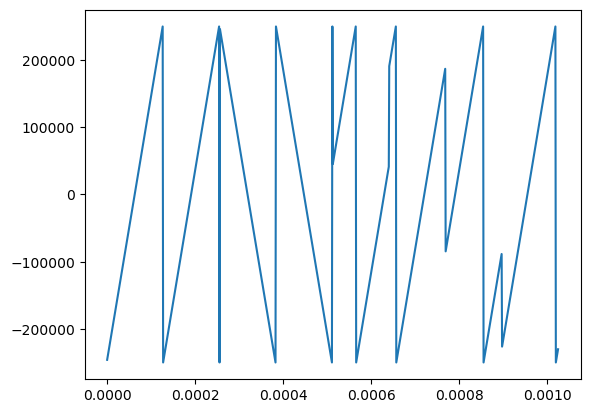

In [98]:
#exemple
Tx=mod_seq(7,'110111110110000111101001',[-250000,250000])

In [99]:
#signal IQ
Tx

[(1+0j),
 (0.8713169449746606+0.49072067553754484j),
 (-0.5149753434221132+0.8572049904586864j),
 (0.8470965784208087+0.5314389775202406j),
 (-0.0396737978859227+0.9992126849481581j),
 (-0.3176642193259177+0.9482032713295474j),
 (-0.4915743939665779+0.8708355844798671j),
 (-0.8747474576913341+0.48457908050445975j),
 (-0.8770312596294039+0.4804333144494263j),
 (-0.5148202453584909+0.8572981482360866j),
 (0.7219505569979869-0.6919446460883243j),
 (-0.9904966790836923+0.1375366450229794j),
 (-0.17094603612654433+0.9852803929504648j),
 (0.9986467792242901-0.052005868370329146j),
 (0.36641068190996334+0.930453229443735j),
 (-0.8493270065546631-0.527867062750552j),
 (0.8155854049379692-0.578636714400468j),
 (-0.3133354170670261-0.9496425203261661j),
 (-0.8504620562573149+0.5260363969028947j),
 (-0.7761036180151833-0.6306054028501044j),
 (-0.24595317835601085+0.9692817103693726j),
 (0.9888224753246956+0.14909766025240603j),
 (-0.9760159707747904-0.21769893153744116j),
 (0.8114078074689763+0.5